In [1]:
using Pkg
Pkg.update()

    Updating registry at `C:\Users\saber\.julia\registries\General.toml`
  No Changes to `C:\Users\saber\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\saber\.julia\environments\v1.11\Manifest.toml`


In [2]:
Threads.nthreads()

20

In [3]:
Pkg.add("WebIO")
using Plots, LinearAlgebra, Random, Distributions
println("The libraries are imported")

   Resolving package versions...
  No Changes to `C:\Users\saber\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\saber\.julia\environments\v1.11\Manifest.toml`


The libraries are imported


## Dubin's Car dynamic 

In [4]:
# Debugging-enabled Dynamics function for the Dubins car
function dynamics(state, action, constant_speed, delta_t)

    x, y, theta = state
    v = constant_speed  # Use the provided constant speed
    omega = action      # Rotational speed (action)

    # Update state based on Dubins car dynamics
    x_next = x + v * cos(theta) * delta_t
    y_next = y + v * sin(theta) * delta_t
    theta_next = theta + omega * delta_t
    return (x_next, y_next, theta_next)
end

dynamics (generic function with 1 method)

In [5]:
# Define initial state (x, y, theta)
state = (0.0, 0.0, 1)  # Starting at the origin with an angle of π/4 radians

# Define control inputs
action = 1           # Rotational speed (omega), e.g., turning rate
constant_speed = 1.0    # Speed (v), e.g., 1 unit/second

# Define time step
delta_t = 0.1           # Time step in seconds
# Call the dynamics function
next_state = dynamics(state, action, constant_speed, delta_t)
# Print the result
println("Next state: ", next_state)

Next state: (0.05403023058681398, 0.08414709848078966, 1.1)


## Signed Distance Function 

In [6]:
# Cost function penalizing proximity to boundaries
function g(state)
    x, y, theta = state
    # Define bounds
    min_x, max_x = -1, 1
    min_y, max_y = -1, 1
    

    # Cost function: penalize being close to boundaries
    if min_x ≤ x ≤ max_x && min_y ≤ y ≤ max_y
        return -minimum([x - min_x, max_x - x, y - min_y, max_y - y])
    else
        dx = max(min_x - x, 0, x - max_x)
        dy = max(min_y - y, 0, y - max_y)
        return sqrt(dx^2 + dy^2)
    end
end

g (generic function with 1 method)

In [7]:
g(state)

-1.0

## Normal Disturbution 

In [8]:
# Function to generate bounded normal samples
function generate_bounded_normal_samples(mean, variance, lower_bound, upper_bound, num_samples)
    std_dev = sqrt(variance)
    samples = Float64[]

    while length(samples) < num_samples
        sample = rand(Normal(mean, std_dev))
        if lower_bound ≤ sample ≤ upper_bound
            push!(samples, sample)
        end
    end

    return samples
end

generate_bounded_normal_samples (generic function with 1 method)

In [9]:
generate_bounded_normal_samples(0.0, 0.01, -0.05, 0.05, 10)

10-element Vector{Float64}:
 -0.024779312056682476
  0.01172418789313523
 -0.027445720080078697
  0.025699553504050173
 -0.011277342063333673
 -0.02244258735370828
 -0.04911985849613053
  0.021995731344237747
 -0.03566364031590372
 -0.02641836505973691

# ----------------------------
## 2. Define Grids and Actions
# ----------------------------

In [10]:
# Define state bounds and grids
lower_x, upper_x = -2.0, 2.0
lower_y, upper_y = -2.0, 2.0
num_x, num_y = 40, 40  # Grid resolution for x and y
x_grid = range(lower_x, upper_x, length=num_x)
y_grid = range(lower_y, upper_y, length=num_y)

x_grid = round.(collect(x_grid), digits=3)
y_grid = round.(collect(y_grid), digits=3)

40-element Vector{Float64}:
 -2.0
 -1.897
 -1.795
 -1.692
 -1.59
 -1.487
 -1.385
 -1.282
 -1.179
 -1.077
 -0.974
 -0.872
 -0.769
  ⋮
  0.872
  0.974
  1.077
  1.179
  1.282
  1.385
  1.487
  1.59
  1.692
  1.795
  1.897
  2.0

In [80]:
# Define theta grid in degree
num_theta=4
theta_grid =[0, pi/2, pi, 3*pi/2, pi]

5-element Vector{Float64}:
 0.0
 1.5707963267948966
 3.141592653589793
 4.71238898038469
 3.141592653589793

In [81]:
action_1=range(-1, 1, step=0.1)
action_2=range(-1, 1, step=0.1)

-1.0:0.1:1.0

# Initializing

In [82]:
time_steps = 10
V = fill(Inf, time_steps + 1, num_theta, num_y, num_x)

11×4×40×40 Array{Float64, 4}:
[:, :, 1, 1] =
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf

[:, :, 2, 1] =
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf

[:, :, 3, 1] =
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf

;;; … 

[:, :, 38, 1] =
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf

[:, :, 39, 1] =
 

In [83]:
# Initialize Policy: policy[time, theta, y, x]
policy = Array{Tuple{Float64, Float64}}(undef, time_steps, num_theta, num_y, num_x)


10×4×40×40 Array{Tuple{Float64, Float64}, 4}:
[:, :, 1, 1] =
 (1.10549e-311, 1.10605e-311)  …  (1.29508e214, 2.45303e198)
 (7.5604e-319, 1.40075e-76)       (1.4862e-70, 6.01335e-154)
 (3.70631e-81, 1.48773e195)       (4.34645e270, 2.7929e275)
 (7.82957e247, 7.9e-322)          (6.50274e265, 7.0971e-67)
 (7.5565e-319, 5.73843e180)       (1.41441e190, 1.25648e-71)
 (5.16173e-72, 3.68254e228)    …  (3.70631e-81, 1.48773e195)
 (9.68396e252, 1.77831e-19)       (7.82957e247, 1.45913e-152)
 (8.22067e223, 3.32304e-27)       (3.99529e252, 2.56367e-139)
 (9.01618e-61, 1.39872e-76)       (2.69773e-110, 1.91075e-52)
 (4.26186e270, 6.81003e199)       (4.16306e-62, 1.3674e-61)

[:, :, 2, 1] =
 (4.58777e-72, 5.08567e58)     …  (6.90911e228, 2.18174e243)
 (1.65691e-153, 1.35684e-153)     (3.94357e180, 4.72166e257)
 (1.17687e-47, 6.3856e-67)        (6.995e228, 1.48861e195)
 (1.7101e214, 1.9036e185)         (6.995e228, 4.63591e199)
 (1.91295e214, 1.47825e179)       (2.02808e-153, 9.08906e223)
 (6.85875e-

In [15]:
# Terminal cost is zero
V[end, :, :, :] .= 0.0

360×40×40 view(::Array{Float64, 4}, 11, :, :, :) with eltype Float64:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0

In [84]:
# Function to get the closest grid indices for a given state
function get_indices(state, x_grid, y_grid, theta_grid)
    x, y, theta = state
    x_idx = argmin(abs.(x_grid .- x))
    y_idx = argmin(abs.(y_grid .- y))
    # Find closest theta index
    theta_diff = abs.(theta_grid .- theta)
    theta_idx = argmin(theta_diff)
    return theta_idx, y_idx, x_idx
end

get_indices (generic function with 1 method)

In [85]:
get_indices(state, x_grid, y_grid, theta_grid)

(4, 40, 40)

## -------------------------------
# 3. Dynamic programming 
## -------------------------------

In [ ]:
# Perform backward iteration
for k in time_steps:-1:1
    println("Calculating optimal policy for time step $k")
    for (ti, theta) in enumerate(theta_grid)
        for (yi, y) in enumerate(y_grid)
            for (xi, x) in enumerate(x_grid)
                state = (x, y, theta)
                min_value = Inf
                best_action_idx = -1
                best_constant_speed_idx = -1

                for action in action_1
                    for constant_speed in action_2
                        # Compute the next state
                        next_state = dynamics(state, action, constant_speed, delta_t)
                        x_next, y_next, theta_next = next_state

                        # Check if next_state is within bounds
                        if (lower_x ≤ x_next ≤ upper_x) && (lower_y ≤ y_next ≤ upper_y)
                            # Find indices of next_state
                            theta_next_idx, y_next_idx, x_next_idx = get_indices(next_state, x_grid, y_grid, theta_grid)

                            # Ensure indices are within bounds
                            if 1 ≤ theta_next_idx ≤ num_theta && 1 ≤ y_next_idx ≤ num_y && 1 ≤ x_next_idx ≤ num_x
                                current_value = V[k + 1, theta_next_idx, y_next_idx, x_next_idx]
                            else
                                current_value = Inf
                            end
                        else
                            current_value = Inf
                        end

                        # Compute future value
                        future_value = min(g(state), current_value)

                        # Update minimum value and best actions
                        if future_value < min_value
                            min_value = future_value
                            best_action_idx = action
                            best_constant_speed_idx = constant_speed
                        end
                    end
                end

                # Update Value Function and Policy
                V[k, ti, yi, xi] = min_value
                policy[k, ti, yi, xi] = (best_action_idx, best_constant_speed_idx)  # Store as tuple
            end
        end
    end
end


# ----------------------------
# 5. Prepare Data for Surface Plot
# ----------------------------

In [87]:
# Extract value function slice for theta = 0
theta_zero = 90
# Find the theta index closest to theta_zero
theta_zero_idx = argmin(abs.(theta_grid .- theta_zero))
current_V = V[1, theta_zero_idx, :, :]  # Value function at time step 1
Z = current_V

40×40 Matrix{Float64}:
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  

# ----------------------------
# 6. Interactive 3D Plot with PlotlyJS
# ----------------------------

In [88]:
using Plots

# Extract value function slice for theta = 0
theta_zero = 120
theta_zero_idx = argmin(abs.(theta_grid .- theta_zero))
current_V = V[1, theta_zero_idx, :, :]  # Value function at time step 1

# Convert grids to vectors for plotting
x_vector = collect(x_grid)
y_vector = collect(y_grid)

# 1. 3D Surface Plot
surface_plot = surface(x_vector, y_vector, current_V', 
    xlabel = "State 1 (x)", 
    ylabel = "State 2 (y)", 
    zlabel = "Value V", 
    title = "3D Surface Plot of V at Time Step 1")

# 2. Side View: Value Function vs State 1 (x)
value_vs_x_plot = plot(x_vector, current_V[:, div(length(y_vector), 2)], 
    xlabel = "State 1 (x)", 
    ylabel = "Value V", 
    title = "Value Function vs State 1 (x)", 
    legend = false)

# 3. Side View: Value Function vs State 2 (y)
value_vs_y_plot = plot(y_vector, current_V[div(length(x_vector), 2), :], 
    xlabel = "State 2 (y)", 
    ylabel = "Value V", 
    title = "Value Function vs State 2 (y)", 
    legend = false)

# 4. Top View of 3D Plot with Zero Level Set
top_view_plot = contour(x_vector, y_vector, current_V', 
    xlabel = "State 1 (x)", 
    ylabel = "State 2 (y)", 
    title = "Top View of 3D Plot with Zero Level Set", 
    fill = true, 
    levels = range(minimum(current_V), stop=maximum(current_V), length=20))
# Highlight zero level set
contour!(x_vector, y_vector, current_V', 
    levels = [0.0], 
    color = :red, 
    linewidth = 2)

# Combine plots into a single layout
plot(
    surface_plot, 
    value_vs_x_plot, 
    value_vs_y_plot, 
    top_view_plot, 
    layout = (2, 2), 
    size = (1000, 800)
)


┌ Warning: Multiple series with different levels share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\saber\.julia\packages\Plots\Ec1L1\src\backends\gr.jl:528
┌ Warning: Multiple series with different levels share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\saber\.julia\packages\Plots\Ec1L1\src\backends\gr.jl:528


┌ Warning: Multiple series with different levels share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\saber\.julia\packages\Plots\Ec1L1\src\backends\gr.jl:528
GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW


In [89]:
# Simulation parameters
delta_t = 0.1  # Time step
sim_time = 10.0  # Total simulation time in seconds
num_steps = Int(sim_time / delta_t)  # Number of simulation steps

# Initial condition
initial_state = (0.5, 0.5, 0.0)  # (x, y, theta)
current_state = initial_state

# Boundary definition
boundary_x = [-1.0, 1.0, 1.0, -1.0, -1.0]
boundary_y = [-1.0, -1.0, 1.0, 1.0, -1.0]

# Initialize trajectory
trajectory = Vector{Tuple{Float64, Float64, Float64}}()
push!(trajectory, initial_state)  # Add the initial state

# Initialize inputs storage
inputs = Vector{Tuple{Float64, Float64}}()  # (ω, v)

# Run simulation
for t_index in 1:10
    x, y, theta = current_state

    # Dummy indices and policy for demonstration (adjust as needed)
    x_index, y_index, theta_index=get_indices(current_state, x_grid, y_grid, theta_grid)
    action = policy[t_index, theta_index, y_index, x_index]

    # Save input action
    push!(inputs, action)


    current_state = dynamics(current_state, action[1], -1, delta_t)
    push!(trajectory, current_state)
end

LoadError: BoundsError: attempt to access 10×4×40×40 Array{Tuple{Float64, Float64}, 4} at index [1, 25, 25, 1]

Status `C:\Users\saber\.julia\environments\v1.11\Project.toml`
  [91a5bcdd] Plots v1.40.9


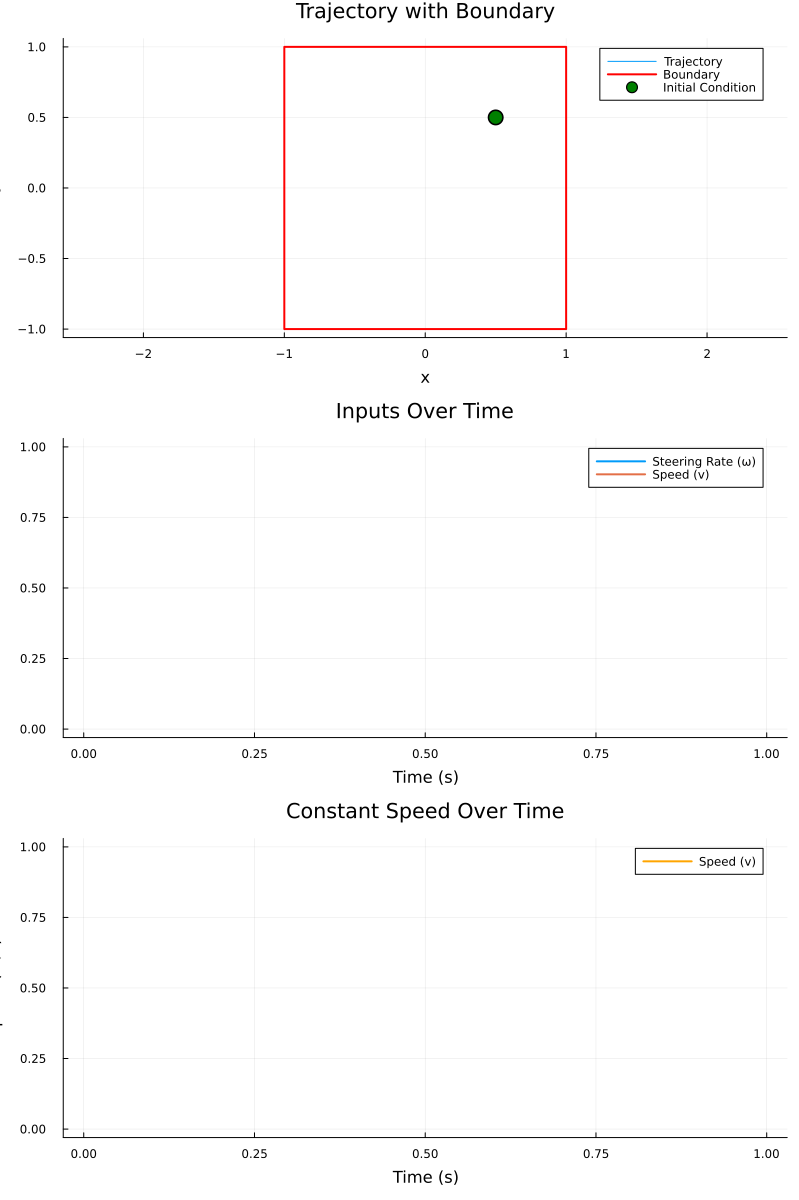

In [90]:
import Pkg
Pkg.status("Plots")

using Plots
gr()  # Set GR backend explicitly

# Ensure lengths of inputs and input_time match
input_time = 0:delta_t:(num_steps * delta_t - delta_t)
input_time = input_time[1:length(inputs)]  # Adjust input_time to match inputs length

# Extract trajectory components
x_traj = [s[1] for s in trajectory]
y_traj = [s[2] for s in trajectory]

# Boundary definition
boundary_x = [-1, 1, 1, -1, -1]  # Close the boundary rectangle
boundary_y = [-1, -1, 1, 1, -1]

# Extract steering rate (omega) and speed (v) from inputs
omega = [action[1] for action in inputs]
speed = [action[2] for action in inputs]

# 1. Plot inputs over time (Steering rate and Speed)
input_plot = plot(input_time, 
    [omega speed], 
    label=["Steering Rate (ω)" "Speed (v)"], 
    xlabel="Time (s)", ylabel="Value", 
    title="Inputs Over Time", 
    linewidth=2)

# 2. Plot trajectory with boundary and initial condition
trajectory_plot = plot(x_traj, y_traj, 
    label="Trajectory", 
    xlabel="x", ylabel="y", 
    title="Trajectory with Boundary", 
    legend=true, aspect_ratio=:equal)

# Add boundary
plot!(trajectory_plot, boundary_x, boundary_y, color=:red, label="Boundary", linewidth=2)

# Mark initial condition
scatter!(trajectory_plot, [x_traj[1]], [y_traj[1]], color=:green, label="Initial Condition", markersize=8)

# 3. Plot constant speed over time
speed_plot = plot(input_time, speed, 
    label="Speed (v)", 
    xlabel="Time (s)", ylabel="Speed (m/s)", 
    title="Constant Speed Over Time", 
    color=:orange, linewidth=2)

# Combine all three plots into a single layout
combined_plot = plot(trajectory_plot, input_plot, speed_plot, layout=(3, 1), size=(800, 1200))

# Save and display the plot
savefig(combined_plot, "trajectory_and_inputs_plot.png")
display(combined_plot)

In [91]:
inputs

Tuple{Float64, Float64}[]